In [3]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
os.getcwd()
#os.chdir('C:/Users/Desktop/Python Projects/ex1data2.txt')

'C:\\Users\\yashh'

In [5]:
df = pd.read_csv('C:\\Users\\yashh\\OneDrive\\Desktop\\Python Projects\\ex1data2.txt', sep=',', header=None)
df.columns = ['house_size', 'bedrooms', 'house_price']

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
house_size,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
bedrooms,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
house_price,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


> By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.


We can speed up gradient descent by having each of our input values in roughly the same range, ideally $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Feature scaling: involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable
* Mean normalization: involves subtracting the average value for an input variable from the values for that input variable

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.



In [7]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)
        #print
        
    X = (X - mean)/std
    return X, mean, std

In [8]:
df.columns[1]

'bedrooms'

In [9]:
X_norm, mu, sigma = feature_normalize(df[['house_size', 'bedrooms']])

In [10]:
print(mu)
print(sigma)

[2000.68085106    3.17021277]
[7.94702354e+02 7.60981887e-01]


In [11]:
X_norm[0]

array([ 0.13000987, -0.22367519])

In [12]:
df['house_size_normalized'] = X_norm[:,0]

In [13]:
df.head()

,house_size,bedrooms,house_price,house_size_normalized
0,2104,3,399900,0.130010
1,1600,3,329900,-0.504190
2,2400,3,369000,0.502476
3,1416,2,232000,-0.735723
4,3000,4,539900,1.257476


In [14]:
df['bedroom_normalized'] = X_norm[:,1]

In [15]:
df.head()

,house_size,bedrooms,house_price,house_size_normalized,bedroom_normalized
0,2104,3,399900,0.130010,-0.223675
1,1600,3,329900,-0.504190,-0.223675
2,2400,3,369000,0.502476,-0.223675
3,1416,2,232000,-0.735723,-1.537767
4,3000,4,539900,1.257476,1.090417


In [16]:
df[['house_size_normalized', 'bedrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
house_size_normalized,47.0,1.889741e-17,1.000000,-1.445423,-0.71559,-0.14179,0.337635,3.117292
bedrooms,47.0,3.170213e+00,0.760982,1.000000,3.00000,3.00000,4.000000,5.000000


In [17]:
df.head()

,house_size,bedrooms,house_price,house_size_normalized,bedroom_normalized
0,2104,3,399900,0.130010,-0.223675
1,1600,3,329900,-0.504190,-0.223675
2,2400,3,369000,0.502476,-0.223675
3,1416,2,232000,-0.735723,-1.537767
4,3000,4,539900,1.257476,1.090417


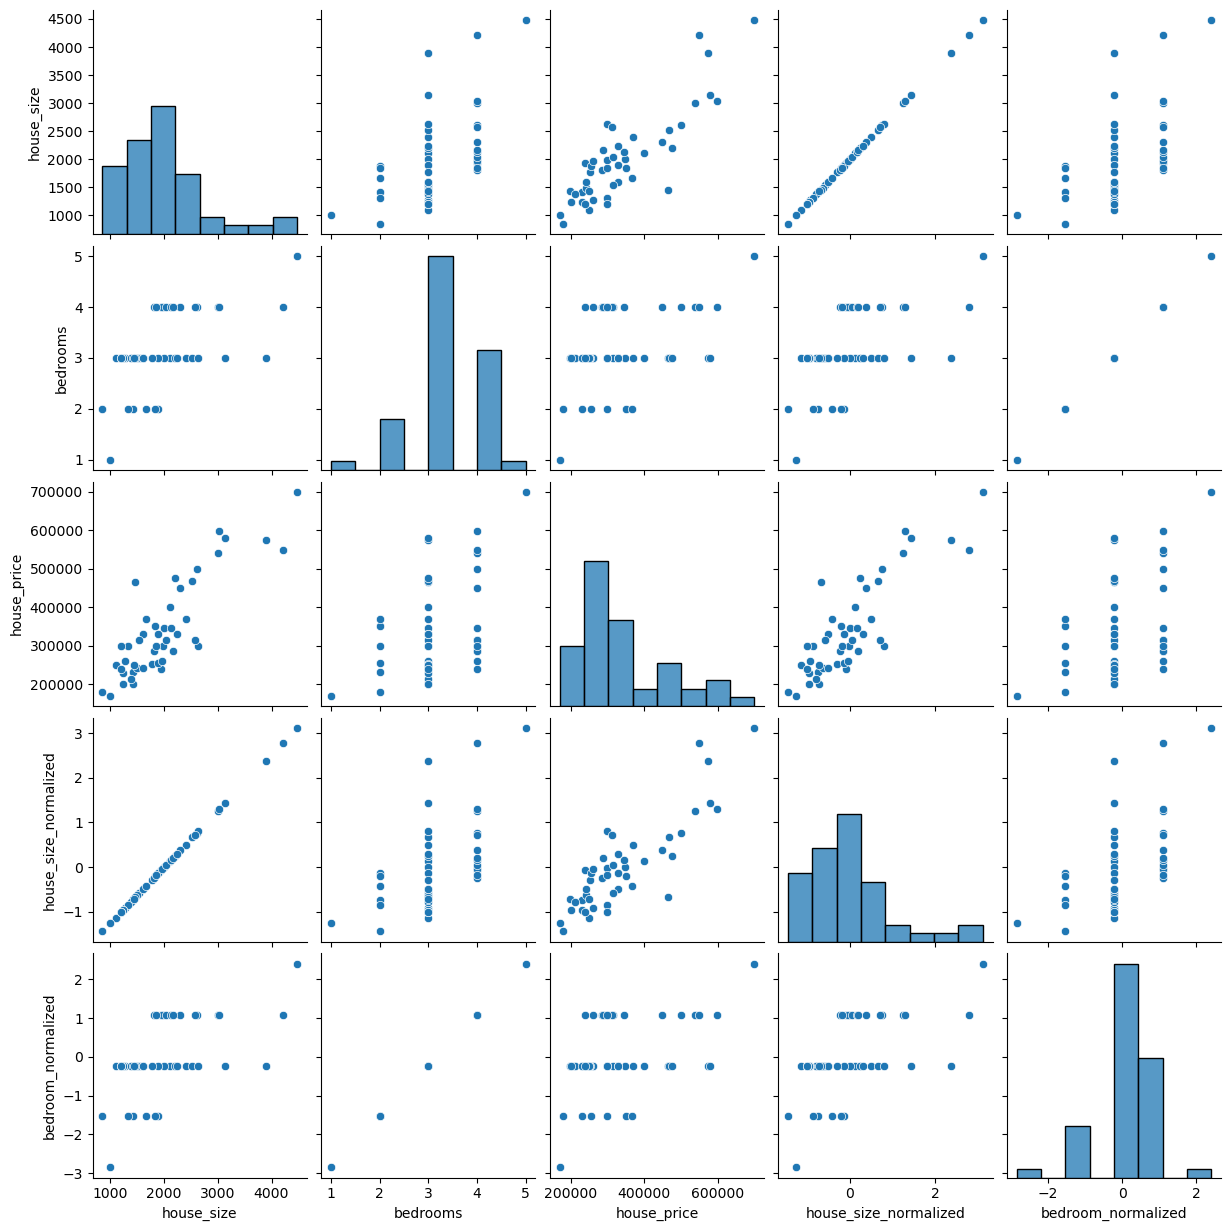

In [18]:
sns.pairplot(df)

<AxesSubplot:>

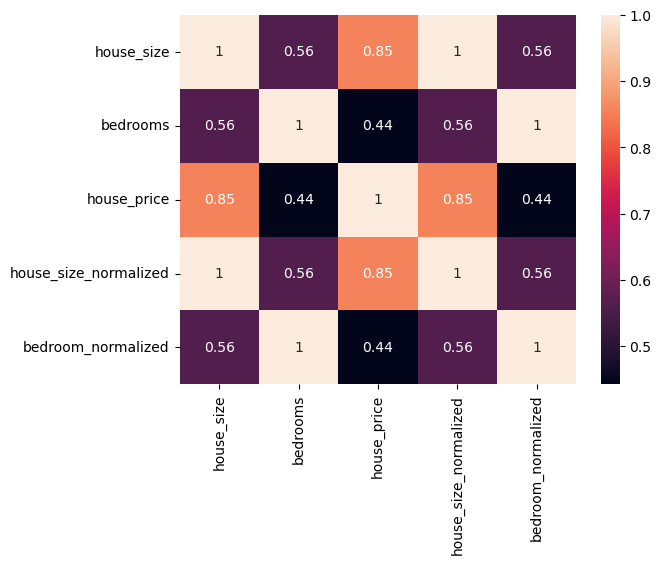

In [19]:
sns.heatmap(df.corr(), annot=True)

3. 
### 1.2 Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent. Gradient descent is a generic optimization algorithm that measures the local gradient of the cost function with regards to the parameter $\theta$ and goes in the direction of descending gradient.

The hypothesis of linear regression is:

$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$

The objective of linear regression is to minimize the cost function (Root Mean Square Error RMSE):

$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $

To minimize the cost of $J(\theta)$ we will use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

Algorithm:

repeat until convergence:
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Learning rate to small: slow gradient descent
* Learning rate to large: gradient descent can overshoot the minimum, may fail to converge


In [20]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [21]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))
    
    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y
        
        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)
        
    return theta, J_history

In [22]:
m = df.shape[0]
m 

47

In [23]:
X = np.hstack((np.ones((m,1)), X_norm))

In [24]:
y = np.array(df.house_price.values).reshape(-1, 1)
#y uncomment to check

In [25]:
theta = np.zeros(shape=(X.shape[1], 1))

In [26]:
theta

array([[0.],
       [0.],
       [0.]])

In [27]:
X.shape[1]

3

In [28]:
#learning rate
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b', 'r', 'g', 'c']
num_iters = 50

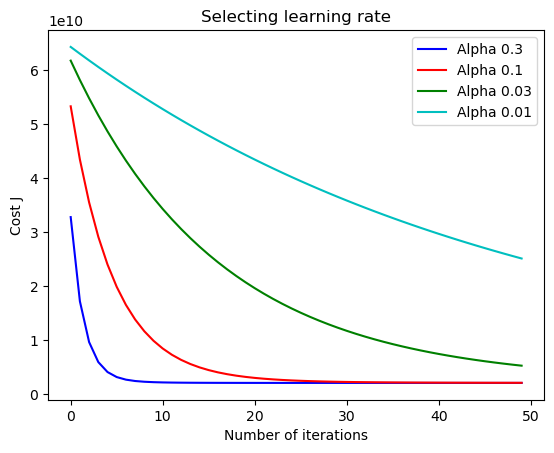

In [29]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1], 1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
    
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Selecting learning rate')
plt.legend()
plt.show()

In [30]:
theta

array([[134460.93520149],
       [ 39283.22767351],
       [ 16518.64191783]])

In [31]:
iterations = 50
alpha = 0.3
theta, _= gradient_descent(X, y, theta, alpha, iterations)

In [32]:
sqft = (2104 - mu[0])/sigma[0]
sqft

0.13000986907454054

In [33]:
bedrooms = -0.223675
(3 - mu[1])/sigma[1]

-0.22367518716859133

In [34]:
y_pred = theta[1]*sqft + theta[2]*bedrooms + theta[0]

In [35]:
y_pred

array([356266.5482756])

In [36]:
sqft = (1650 - mu[0])/sigma[0]
bedrooms = (3 - mu[1])/sigma[1]
y_pred = theta[1]*sqft + theta[2]*bedrooms + theta[0]
y_pred

array([293091.64708671])

In [37]:
df.head()

,house_size,bedrooms,house_price,house_size_normalized,bedroom_normalized
0,2104,3,399900,0.130010,-0.223675
1,1600,3,329900,-0.504190,-0.223675
2,2400,3,369000,0.502476,-0.223675
3,1416,2,232000,-0.735723,-1.537767
4,3000,4,539900,1.257476,1.090417


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_norm, y)

LinearRegression()

In [39]:
model.intercept_, model.coef_

(array([340412.65957447]), array([[110631.05027885,  -6649.47427082]]))

In [40]:
sqft = 0.13000986907454054
bedrooms = -0.22367518716859133
y_pred = model.coef_[0][0]*sqft + model.coef_[0][1]*bedrooms + model.intercept_
y_pred

array([356283.1103389])

In [41]:
predictions = []
def compute_pred():
    m = df.shape[0]
    for i in range(m):
        sqft = df['house_size_normalized'][i]
        bedrooms = df['bedroom_normalized'][i]
        y_pred = theta[0] + theta[1]*sqft + theta[2]*bedrooms
        predictions.append(y_pred)

In [42]:
compute_pred()

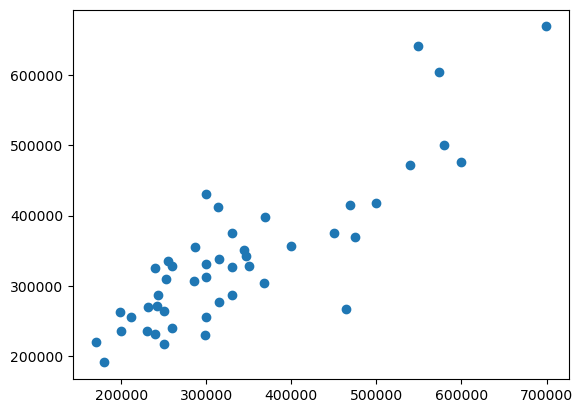

In [43]:
plt.scatter(y, predictions)